In [10]:
!pwd

/Users/nicholas/Code/PP2_reliability_score_pred/notebooks


In [29]:
import subprocess
import re

def calculate_tm_score(tmalign_path, pdb1_path, pdb2_path):
    """
    Calculate the TM-score between two protein structures using TM-align.

    Parameters:
        tmalign_path (str): Path to the TM-align executable.
        pdb1_path (str): Path to the first PDB file (query protein).
        pdb2_path (str): Path to the second PDB file (template protein).

    Returns:
        dict: A dictionary with TM-score and RMSD.
    """
    try:
        # Run TM-align as a subprocess
        result = subprocess.run(
            [tmalign_path,pdb1_path, pdb2_path],
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True
        )
        
        # Check for errors in TM-align execution
        if result.returncode != 0:
            raise RuntimeError(f"TM-align failed: {result.stderr.strip()}")
        
        # Parse TM-align output for TM-score and RMSD
        output = result.stdout
        # print(f"Raw Output: {output}")
        tm_scores = re.findall(r"TM-score\s*=\s*([\d.]+)", output)
        rmsd = re.search(r"RMSD\s*=\s*([\d.]+)", output)

        if tm_scores:
            return {
                "TM-score (normalized to length of PDB1)": float(tm_scores[0]),
                "TM-score (normalized to length of PDB2)": float(tm_scores[1]) if len(tm_scores) > 1 else None,
                "RMSD": float(rmsd.group(1)) if rmsd else None,
            }
        else:
            raise ValueError("Failed to parse TM-align output for TM-score.")
    except Exception as e:
        print(f"Error: {e}")
        return None


# Example usage
if __name__ == "__main__":
    tmalign_path = "../../../Downloads/TMscore"  # Replace with the path to your TM-align executable
    pdb1_path = "../jsonl_files/train_pdbs/12as-A.pdb"  # Path to the first PDB file
    pdb2_path = "../jsonl_files/train_pdbs/16vp-A.pdb"  # Path to the second PDB file

    tm_score_result = calculate_tm_score(tmalign_path, pdb1_path, pdb2_path)
    if tm_score_result:
        print("TM-align Results:")
        print(tm_score_result)


Raw Output: 
 *************************************************************************
 *                                 TM-SCORE                              *
 * A scoring function to assess the similarity of protein structures     *
 * Based on statistics:                                                  *
 *       0.0 < TM-score < 0.17, random structural similarity             *
 *       0.5 < TM-score < 1.00, in about the same fold                   *
 * Reference: Yang Zhang and Jeffrey Skolnick, Proteins 2004 57: 702-710 *
 * For comments, please email to: zhanglab@zhanggroup.org                *
 *************************************************************************

Structure1: ../jsonl_files/train_pdbs/12as-A.pdb    Length=  327
Structure2: ../jsonl_files/train_pdbs/16vp-A.pdb    Length=  311 (by which all scores are normalized)
Number of residues in common=  284
RMSD of  the common residues=   25.674

TM-score    = 0.1398  (d0= 6.46)
MaxSub-score= 0.0491  (d0= 3.50)
GDT

In [ ]:
import subprocess
import re

def calculate_tm_score(tmalign_path, pdb1_path, pdb2_path):
    """
    Calculate the TM-score between two protein structures using TM-align.

    Parameters:
        tmalign_path (str): Path to the TM-align executable.
        pdb1_path (str): Path to the first PDB file (query protein).
        pdb2_path (str): Path to the second PDB file (template protein).

    Returns:
        dict: A dictionary with TM-score and RMSD.
    """
    try:
        # Run TM-align as a subprocess
        result = subprocess.run(
            [tmalign_path,pdb1_path, pdb2_path],
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True
        )
        
        # Check for errors in TM-align execution
        if result.returncode != 0:
            raise RuntimeError(f"TM-align failed: {result.stderr.strip()}")
        
        # Parse TM-align output for TM-score and RMSD
        output = result.stdout
        # print(f"Raw Output: {output}")
        tm_scores = re.findall(r"TM-score\s*=\s*([\d.]+)", output)
        rmsd = re.search(r"RMSD\s*=\s*([\d.]+)", output)

        if tm_scores:
            return {
                "TM-score (normalized to length of PDB1)": float(tm_scores[0]),
                "TM-score (normalized to length of PDB2)": float(tm_scores[1]) if len(tm_scores) > 1 else None,
                "RMSD": float(rmsd.group(1)) if rmsd else None,
            }
        else:
            raise ValueError("Failed to parse TM-align output for TM-score.")
    except Exception as e:
        print(f"Error: {e}")
        return None


# Example usage
if __name__ == "__main__":
    tmalign_path = "../../../Downloads/TMscore"  # Replace with the path to your TM-align executable
    pdb1_path = "../jsonl_files/train_pdbs/12as-A.pdb"  # Path to the first PDB file
    pdb2_path = "../jsonl_files/train_pdbs/16vp-A.pdb"  # Path to the second PDB file

    tm_score_result = calculate_tm_score(tmalign_path, pdb1_path, pdb2_path)
    if tm_score_result:
        print("TM-align Results:")
        print(tm_score_result)


In [28]:
!pwd

/Users/nicholas/Code/PP2_reliability_score_pred/notebooks


In [43]:
import os
import subprocess
import re
import pandas as pd
from tqdm import tqdm

def calculate_tm_score(tmalign_path, pdb1_path, pdb2_path):
    """
    Calculate the TM-score between two protein structures using TM-align.

    Parameters:
        tmalign_path (str): Path to the TM-align executable.
        pdb1_path (str): Path to the first PDB file (query protein).
        pdb2_path (str): Path to the second PDB file (template protein).

    Returns:
        float: The TM-score normalized to the length of PDB1.
    """
    try:
        # Run TM-align as a subprocess
        result = subprocess.run(
            [tmalign_path, pdb1_path, pdb2_path],
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True
        )
        
        # Check for errors in TM-align execution
        if result.returncode != 0:
            raise RuntimeError(f"TM-align failed: {result.stderr.strip()}")
        
        # Parse TM-align output for TM-score
        output = result.stdout
        tm_score_match = re.search(r"TM-score\s*=\s*([\d.]+)", output)
        tm_score = float(tm_score_match.group(1)) if tm_score_match else None

        return tm_score
    except Exception as e:
        print(f"Error: {e}")
        return None

def calculate_partial_tm_score_matrix(tmalign_path, pdb_files, matrix_name):
    """
    Calculate the TM-score matrix for a subset of PDB files.

    Parameters:
        tmalign_path (str): Path to the TM-align executable.
        pdb_files (list): List of PDB file paths to compare.
        matrix_name (str): Name of the output CSV file.

    Returns:
        None: Saves the resulting matrix to a CSV file.
    """
    # Initialize an empty DataFrame to store the TM-score matrix
    matrix = pd.DataFrame(index=pdb_files, columns=pdb_files)
    
    # Create a progress bar with tqdm
    total_comparisons = len(pdb_files) * (len(pdb_files) + 1) // 2  # Upper triangle + diagonal
    with tqdm(total=total_comparisons, desc=f"Calculating TM-scores for {matrix_name}") as pbar:
        # Calculate TM-scores for all pairs of PDB files
        for i, pdb1 in enumerate(pdb_files):
            for j, pdb2 in enumerate(pdb_files):
                if i <= j:  # Only calculate for upper triangle and diagonal
                    tm_score = calculate_tm_score(tmalign_path, pdb1, pdb2)
                    matrix.at[pdb1, pdb2] = tm_score
                    matrix.at[pdb2, pdb1] = tm_score  # Symmetric matrix
                    pbar.update(1)  # Update progress bar

    # Save the matrix to a CSV file
    matrix.to_csv(matrix_name)
    print(f"Matrix saved to {matrix_name}")

# Main Execution
if __name__ == "__main__":
    tmalign_path = "../../../Downloads/TMscore"  # Replace with the path to your TM-align executable
    test_pdb_folder = "../jsonl_files/test_pdbs/"  # Path to the folder containing PDB files
    val_pdb_folder = "../jsonl_files/val_pdbs/"
    train_pdb_folder = "../jsonl_files/train_pdbs/"
    # Get a list of all PDB files in the folder
    test_pdb_files = [os.path.join(test_pdb_folder, f) for f in os.listdir(test_pdb_folder) if f.endswith(".pdb")]
    val_pdb_files = [os.path.join(val_pdb_folder, f) for f in os.listdir(val_pdb_folder) if f.endswith(".pdb")]
    train_pdb_files = [os.path.join(train_pdb_folder, f) for f in os.listdir(train_pdb_folder) if f.endswith(".pdb")]
    # Split into the first 100 PDBs and the rest
    test_first_100_pdbs = test_pdb_files[:100]
    val_first_100_pdbs = val_pdb_files[:100]
    train_first_100_pdbs = train_pdb_files[:100]

    # Calculate and save the TM-score matrix for the first 100 PDBs
    #calculate_partial_tm_score_matrix(tmalign_path, test_first_100_pdbs, "test_tm_score_matrix_first_100.csv")
    #calculate_partial_tm_score_matrix(tmalign_path, val_first_100_pdbs, "val_tm_score_matrix_first_100.csv")
    calculate_partial_tm_score_matrix(tmalign_path, train_first_100_pdbs, "train_tm_score_matrix_first_100.csv")


Calculating TM-scores for train_tm_score_matrix_first_100.csv: 100%|██████████| 5050/5050 [04:05<00:00, 20.58it/s]

Matrix saved to train_tm_score_matrix_first_100.csv


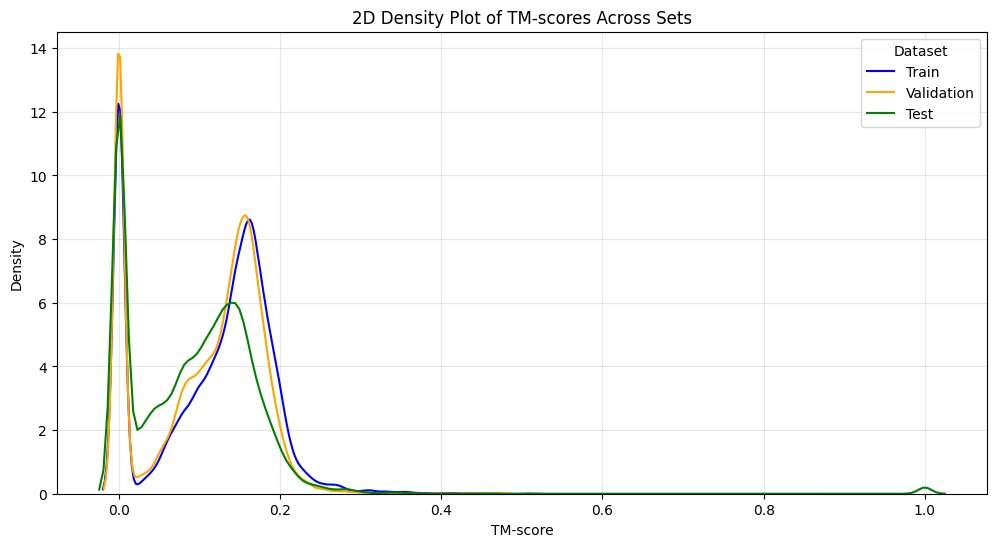

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def load_and_extract_tm_scores(csv_file):
    """
    Load a TM-score matrix from a CSV file and extract the upper triangle (excluding diagonal).

    Parameters:
        csv_file (str): Path to the CSV file.

    Returns:
        np.ndarray: Flattened upper triangle of the matrix.
    """
    tm_score_matrix = pd.read_csv(csv_file, index_col=0)
    tm_score_array = tm_score_matrix.to_numpy()
    tm_scores = []

    for i in range(tm_score_array.shape[0]):
        for j in range(i + 1, tm_score_array.shape[1]):  # Upper triangle only
            value = tm_score_array[i, j]
            if not pd.isnull(value):  # Exclude NaN values
                tm_scores.append(float(value))

    return np.array(tm_scores)

# Load TM-score matrices
test_csv = "test_tm_score_matrix_first_100.csv"  # Replace with your test TM-score matrix CSV file
train_csv = "train_tm_score_matrix_first_100.csv"  # Replace with your train TM-score matrix CSV file
val_csv = "val_tm_score_matrix_first_100.csv"  # Replace with your validation TM-score matrix CSV file

test_tm_scores = load_and_extract_tm_scores(test_csv)
train_tm_scores = load_and_extract_tm_scores(train_csv)
val_tm_scores = load_and_extract_tm_scores(val_csv)

# Create 2D density plots for each matrix
plt.figure(figsize=(12, 6))
\
sns.kdeplot(train_tm_scores, fill=False, bw_adjust=0.5, label="Train", color="blue")
sns.kdeplot(val_tm_scores, fill=False, bw_adjust=0.5, label="Validation", color="orange")
sns.kdeplot(test_tm_scores, fill=False, bw_adjust=0.5, label="Test", color="green")

# Add plot titles and labels
plt.title("2D Density Plot of TM-scores Across Sets")
plt.xlabel("TM-score")
plt.ylabel("Density")
plt.legend(title="Dataset")
plt.grid(alpha=0.3)
plt.show()


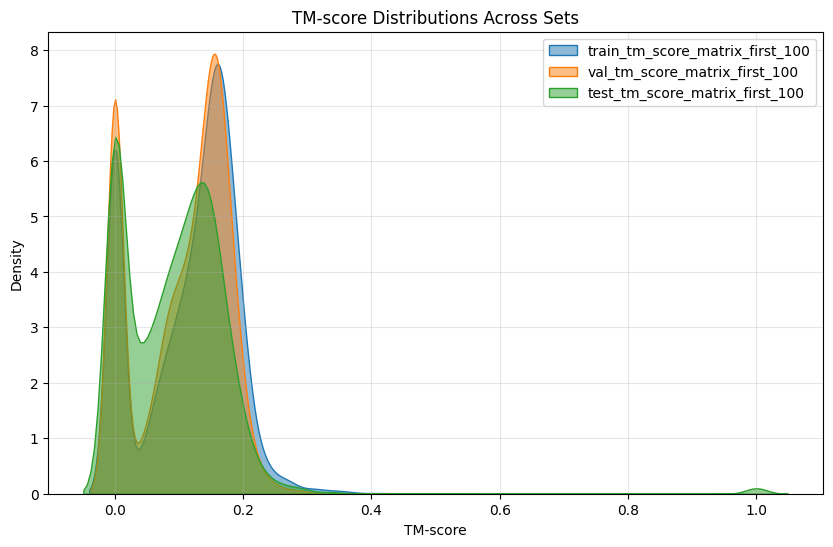

Pearson Correlation Results:
train_tm_score_matrix_first_100 vs val_tm_score_matrix_first_100: Correlation = -0.09, P-value = 1.06e-10
train_tm_score_matrix_first_100 vs test_tm_score_matrix_first_100: Correlation = -0.06, P-value = 4.02e-05
val_tm_score_matrix_first_100 vs train_tm_score_matrix_first_100: Correlation = -0.09, P-value = 1.06e-10
val_tm_score_matrix_first_100 vs test_tm_score_matrix_first_100: Correlation = 0.00, P-value = 9.39e-01
test_tm_score_matrix_first_100 vs train_tm_score_matrix_first_100: Correlation = -0.06, P-value = 4.02e-05
test_tm_score_matrix_first_100 vs val_tm_score_matrix_first_100: Correlation = 0.00, P-value = 9.39e-01

T-test Results:
train_tm_score_matrix_first_100 vs val_tm_score_matrix_first_100: T-statistic = 6.85, P-value = 7.57e-12
train_tm_score_matrix_first_100 vs test_tm_score_matrix_first_100: T-statistic = 14.01, P-value = 3.50e-44
val_tm_score_matrix_first_100 vs train_tm_score_matrix_first_100: T-statistic = -6.85, P-value = 7.57e-12
va

In [51]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Function to load a matrix from a CSV file
def load_matrix(file_path):
    """
    Load a TM-score matrix from a CSV file.

    Parameters:
        file_path (str): Path to the CSV file.

    Returns:
        np.ndarray: A NumPy array representing the TM-score matrix.
    """
    return pd.read_csv(file_path, index_col=0).to_numpy()

# Function to extract upper triangle of a matrix (excluding diagonal)
def extract_upper_triangle(matrix):
    """
    Extract the upper triangle of a matrix (excluding diagonal).

    Parameters:
        matrix (np.ndarray): Input square matrix.

    Returns:
        np.ndarray: Flattened upper triangle of the matrix.
    """
    return matrix[np.triu_indices_from(matrix, k=1)]

# Load matrices from multiple CSV files
folder_path = "/Users/nicholas/Code/PP2_reliability_score_pred/notebooks"  # Replace with the folder containing your .csv files
csv_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(".csv")]

# Store matrices and their upper triangles
matrices = {}
upper_triangles = {}

for file in csv_files:
    matrix_name = os.path.basename(file).replace(".csv", "")
    matrix = load_matrix(file)
    matrices[matrix_name] = matrix
    upper_triangles[matrix_name] = extract_upper_triangle(matrix)

# Compare matrices using Pearson correlation
correlations = {}
for name1, upper1 in upper_triangles.items():
    for name2, upper2 in upper_triangles.items():
        if name1 != name2:
            correlation, p_value = pearsonr(upper1, upper2)
            correlations[f"{name1} vs {name2}"] = (correlation, p_value)

# Compare matrices using t-tests
t_tests = {}
for name1, upper1 in upper_triangles.items():
    for name2, upper2 in upper_triangles.items():
        if name1 != name2:
            t_stat, p_value = ttest_ind(upper1, upper2, equal_var=False)
            t_tests[f"{name1} vs {name2}"] = (t_stat, p_value)

# Visualize TM-score distributions
plt.figure(figsize=(10, 6))
for name, upper in upper_triangles.items():
    sns.kdeplot(upper, label=name, fill=True, alpha=0.5)

plt.title("TM-score Distributions Across Sets")
plt.xlabel("TM-score")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Print results
print("Pearson Correlation Results:")
for pair, (corr, p_val) in correlations.items():
    print(f"{pair}: Correlation = {corr:.2f}, P-value = {p_val:.2e}")

print("\nT-test Results:")
for pair, (t_stat, p_val) in t_tests.items():
    print(f"{pair}: T-statistic = {t_stat:.2f}, P-value = {p_val:.2e}")
